# **Neural Network**
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

# **TASK 1: Develop the neural network model for predicting the count of rental bikes.​**
As experienced in regression exercise, the regression models did not perform well on the task of the count of rental bikes prediction. We look into the deep learing and This task will use the simple 2-layers fully connected neural network model as the example and guide you through the step-by-step process of the whole process of the model development.


## Load and prepare the data
Start by loading the dataset and shaping it so that it's suitable for use in machine learning. This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

In [1]:
import pandas as pd
from sympy.printing.tensorflow import tensorflow

# Define the URL from which to fetch the CSV data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7BikeSharing.csv'

# Use pandas to read the CSV data from the specified URL and store it in a DataFrame 'df'.
df = pd.read_csv(url)   # Display the first 10 rows of the DataFrame 'df'.
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


How many rows and columns does the dataset contain?

In [2]:
df.shape

(17379, 17)

Are any of the columns missing values?

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


## Feature engineering
- Target: `cnt` (count of total rental bikes including both casual and registered)
- Predictors: weather (`temp`, `atemp`, `hum`, `windspeed`, `weathersit`), calendar (`hr`, `weekday`, `workingday`, `holiday`, `season`), and `yr`.
- We keep it simple; you can expand features (e.g., interactions) later.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

target = 'cnt'
features = [
    'temp','atemp','hum','windspeed','weathersit',
    'hr','weekday','workingday','holiday','season','yr'
]

X = df[features].copy()
y = df[target].astype(float)

# Add interaction features (reduced to most important ones)
X['hr_workingday'] = X['hr'] * X['workingday']
X['weathersit_hum'] = X['weathersit'] * X['hum']
X['temp_season'] = X['temp'] * X['season']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features (important for NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**(Optional) quick baseline (Linear Regression)**

In [5]:
# A super-fast baseline, just for context
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print({"LR_RMSE": rmse_lr, "LR_MAE": mae_lr, "LR_R2": r2_lr})

{'LR_RMSE': np.float64(139.17305008032358), 'LR_MAE': np.float64(104.80757307082098), 'LR_R2': 0.3883187664023693}


c:\Users\stan\miniconda3\envs\AH2179\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Create a neural network model
Now it's time build a neural network and train it with the data prepared in the previous exercise. We'll try neural network first and use cross-validation its meaasure accuracy.

In [6]:
#pip install tensorflow

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a Sequential model, which is a linear stack of layers.
model = Sequential()
# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 14.
model.add(Dense(32, activation='relu', input_dim=14))
# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))
# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))
# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
# Display a summary of the model architecture, including the number of parameters.
model.summary()

c:\Users\stan\miniconda3\envs\AH2179\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,657 (10.38 KB)

 Trainable params: 2,657 (10.38 KB)

 Non-trainable params: 0 (0.00 B)

## Training and prediction
We split the dataset into a training and a test dataset. Then, we fit the neural network model with the training dataset and predict the values for the test dataset.

Epoch 1/200
348/348 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 142.3026 - mae: 142.3026 - val_loss: 103.1861 - val_mae: 103.1861
Epoch 2/200
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 101.2575 - mae: 101.2575 - val_loss: 98.7141 - val_mae: 98.7141
Epoch 3/200
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 98.8747 - mae: 98.8747 - val_loss: 97.1392 - val_mae: 97.1392
Epoch 4/200
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 97.5016 - mae: 97.5016 - val_loss: 95.9320 - val_mae: 95.9320
Epoch 5/200
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 96.3818 - mae: 96.3818 - val_loss: 95.3032 - val_mae: 95.3032
Epoch 6/200
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 95.4044 - mae: 95.4044 - val_loss: 94.5152 - val_mae: 94.5152
Epoch 7/200
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 94.4013 - mae: 94.4013 - val_loss: 93.4918 - val_mae: 93.4918
Epoch 8/200
348/348 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 93.3543 - mae: 93.3543 - val_loss: 92.6856 - val_mae: 92.6856
Epoch 9/20

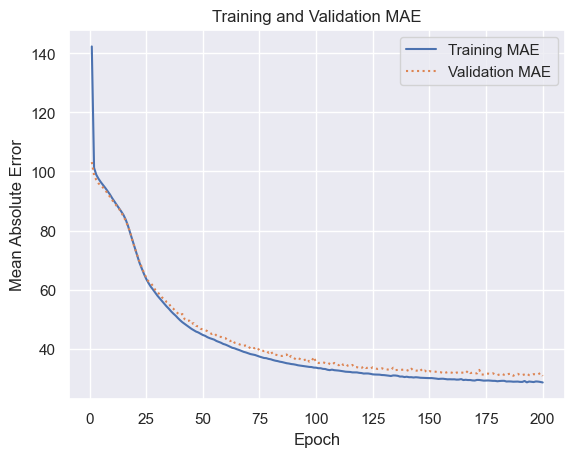

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the model to the training data, specifying validation split, epochs, and batch size.
hist = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=200, batch_size=32)
# Set the style of the plots using Seaborn.
sns.set()
# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']
# Define the number of epochs.
epochs = range(1, len(err) + 1)
# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()
# Use the trained model to predict on the test data.
y_pred = model.predict(X_test_scaled)

## Evaluate the model
You can evaluate the model's performance using various metrics, such as Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared (R2).

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the Mean Absolute Error (MAE) between the true and predicted values.
mae_nn = mean_absolute_error(y_test, y_pred)
# Calculate the Root Mean Squared Error (RMSE) between the true and predicted values.
mse_nn = mean_squared_error(y_test, y_pred)
rmse_nn = mean_squared_error(y_test, y_pred, squared=False)
# Calculate the R-squared (R2) score, a measure of how well the model explains the variance in the data.
r2_nn = r2_score(y_test, y_pred)
# Print the calculated metrics.
print(f"Mean Absolute Error of NN: {mae_nn}")
print(f"Root Mean Squared Error of NN: {rmse_nn}")
print(f"R-squared of NN: {r2_nn}")

Mean Absolute Error of NN: 29.87871935001657
Root Mean Squared Error of NN: 48.026888775853905
R-squared of NN: 0.9271576793688244


c:\Users\stan\miniconda3\envs\AH2179\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Compare Metrics (optional)
we compare the performance of NN with baseline linear regression.

In [10]:
import pandas as pd
results = pd.DataFrame([
    {'Model': 'Linear Regression', 'RMSE': rmse_lr, 'MAE': mae_lr, 'R2': r2_lr},
    {'Model': 'Neural Net', 'RMSE': rmse_nn, 'MAE': mae_nn, 'R2': r2_nn},
])
results

,Model,RMSE,MAE,R2
0,Linear Regression,139.173050,104.807573,0.388319
1,Neural Net,48.026889,29.878719,0.927158


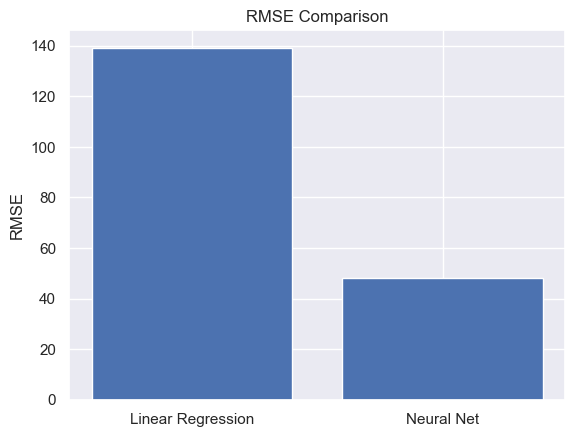

In [11]:
# Bar chart of RMSE
plt.figure()
plt.bar(results['Model'], results['RMSE'])
plt.ylabel('RMSE')
plt.title('RMSE Comparison')
plt.show()

# **Task 2: Practical NN training techniques**
The task will illustrate some useful NN training techniques, including saving and loading the trained model, using the callback function to save the best model, and adding dropout layers.


## Hyperparameter Tuning and Model Optimization

Starting GridSearchCV...
Fitting 3 folds for each of 4 candidates, totalling 12 fits


c:\Users\stan\miniconda3\envs\AH2179\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\stan\miniconda3\envs\AH2179\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\stan\miniconda3\envs\AH2179\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regula


Best parameters: {'learning_rate': 0.01, 'neurons_layer1': 64}
Best CV score (MAE): 30.706875178021054
Epoch 1/30


c:\Users\stan\miniconda3\envs\AH2179\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 108.9431 - mae: 108.9431 - val_loss: 96.2121 - val_mae: 96.2121
Epoch 2/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 108.9431 - mae: 108.9431 - val_loss: 96.2121 - val_mae: 96.2121
Epoch 2/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 94.0672 - mae: 94.0672 - val_loss: 86.9244 - val_mae: 86.9244
Epoch 3/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 94.0672 - mae: 94.0672 - val_loss: 86.9244 - val_mae: 86.9244
Epoch 3/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 80.5918 - mae: 80.5918 - val_loss: 74.2510 - val_mae: 74.2510
Epoch 4/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 80.5918 - mae: 80.5918 - val_loss: 74.2510 - val_mae: 74.2510
Epoch 4/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70.6981 - mae: 70.6981 - val_loss: 67.9846 - val_mae: 67.9846
Epoch 5/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 70.6981 - mae: 70.6981 - val_loss: 67.9846 - val_mae: 67.9846
Epoch 5/30
174/174 ━━━━━━━━━━━━

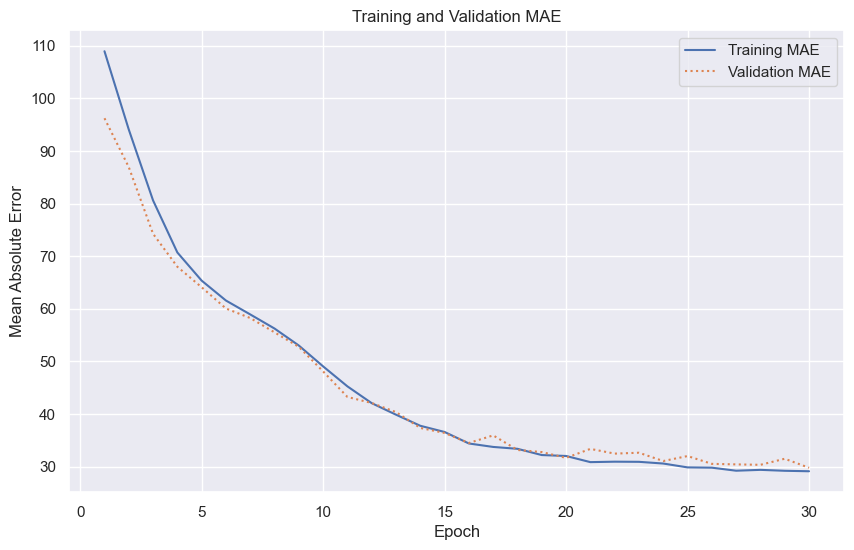

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step

Final Model Performance:
MAE: 28.9325
MSE: 2174.2571
R²: 0.9313

Final Model Performance:
MAE: 28.9325
MSE: 2174.2571
R²: 0.9313


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, RegressorMixin
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

# Create custom estimator for GridSearchCV
class KerasNeuralNetworkRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, neurons_layer1=32, neurons_layer2=64, learning_rate=0.001, 
                 dropout_rate=0.1, batch_size=32, epochs=30):
        self.neurons_layer1 = neurons_layer1
        self.neurons_layer2 = neurons_layer2
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.model_ = None
        
    def _build_model(self, input_dim):
        model = Sequential()
        model.add(Dense(self.neurons_layer1, activation='relu', input_dim=input_dim))
        model.add(Dense(64, activation='relu'))  # Fixed layer
        model.add(Dense(1))
        
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='mae', metrics=['mae'])
        return model
        
    def fit(self, X, y, sample_weight=None):
        self.model_ = self._build_model(X.shape[1])
        self.model_.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self
        
    def predict(self, X):
        return self.model_.predict(X, verbose=0).flatten()

# Define parameter grid (ultra minimal for speed)
param_grid = {
    'neurons_layer1': [32, 64],
    'learning_rate': [0.001, 0.01]
}

print("Starting GridSearchCV...")

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=KerasNeuralNetworkRegressor(),
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest parameters:", best_params)
print("Best CV score (MAE):", -best_score)

# Train final model with best parameters
model = Sequential()
model.add(Dense(best_params['neurons_layer1'], activation='relu', input_dim=14))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss='mae', metrics=['mae'])

# Train the model
hist_2 = model.fit(X_train_scaled, y_train, 
                   validation_split=0.2, 
                   epochs=30, 
                   batch_size=64, 
                   verbose=1)

# Plot training history
sns.set()
err = hist_2.history['mae']
val_err = hist_2.history['val_mae']
epochs = range(1, len(err) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

# Evaluate model
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nFinal Model Performance:")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# **Task 3: Compare the results with a linear regression model**
The task involves comparing the results obtained from the neural network with those from the linear regression model, and we should analyze the reasons behind any differences in the outcomes.

In [20]:
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Set the style of the plots using seaborn.
sns.set()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('--------------------------------------'+'this is result of the neural network model'+"---------------------------------------------")
# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


# Create a Linear Regression model
model_linear = LinearRegression()
model_linear.fit(X_train_scaled, y_train)
y_pred_linear = model_linear.predict(X_test_scaled)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)

print('--------------------------------------'+'this is result of the linear regression model'+"---------------------------------------------")
print(f"Mean Absolute Error of linear model: {mae_linear}")
print(f"Root Mean Squared Error of linear model: {rmse_linear}")
print(f"R-squared of linear model: {r2_linear}")

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step
--------------------------------------this is result of the neural network model---------------------------------------------
Mean Absolute Error: 28.93253189044114
Root Mean Squared Error: 46.62892939124279
R-squared: 0.9313365288999021
--------------------------------------this is result of the linear regression model---------------------------------------------
Mean Absolute Error of linear model: 104.80757307082098
Root Mean Squared Error of linear model: 139.17305008032358
R-squared of linear model: 0.3883187664023693
--------------------------------------this is result of the neural network model---------------------------------------------
Mean Absolute Error: 28.93253189044114
Root Mean Squared Error: 46.62892939124279
R-squared: 0.9313365288999021
--------------------------------------this is result of the linear regression model---------------------------------------------
Mean Absolute Erro

109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step
--------------------------------------this is result of the neural network model---------------------------------------------
Mean Absolute Error: 28.93253189044114
Root Mean Squared Error: 46.62892939124279
R-squared: 0.9313365288999021
--------------------------------------this is result of the linear regression model---------------------------------------------
Mean Absolute Error of linear model: 104.80757307082098
Root Mean Squared Error of linear model: 139.17305008032358
R-squared of linear model: 0.3883187664023693
--------------------------------------this is result of the neural network model---------------------------------------------
Mean Absolute Error: 28.93253189044114
Root Mean Squared Error: 46.62892939124279
R-squared: 0.9313365288999021
--------------------------------------this is result of the linear regression model---------------------------------------------
Mean Absolute Erro

c:\Users\stan\miniconda3\envs\AH2179\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\stan\miniconda3\envs\AH2179\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## LSTM


In [19]:
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
import numpy as np

class LSTMRegressor:
    def __init__(self, timesteps=24, lstm_units=50, dropout_rate=0.2, epochs=50, batch_size=32):
        self.timesteps = timesteps
        self.lstm_units = lstm_units
        self.dropout_rate = dropout_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None
        
    def create_sequences(self, X, y):
        X_seq, y_seq = [], []
        # Convert y to numpy array to use integer indexing
        if hasattr(y, 'values'):
            y_array = y.values
        else:
            y_array = np.array(y)
        
        for i in range(len(X) - self.timesteps):
            X_seq.append(X[i:(i + self.timesteps)])
            y_seq.append(y_array[i + self.timesteps])
        return np.array(X_seq), np.array(y_seq)
    
    def build_model(self, input_shape):
        model = Sequential()
        model.add(LSTM(self.lstm_units, return_sequences=True, input_shape=input_shape))
        model.add(Dropout(self.dropout_rate))
        model.add(LSTM(self.lstm_units))
        model.add(Dropout(self.dropout_rate))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mae', metrics=['mae'])
        return model
    
    def fit(self, X, y):
        X_seq, y_seq = self.create_sequences(X, y)
        input_shape = (self.timesteps, X.shape[1])
        self.model = self.build_model(input_shape)
        self.model.fit(X_seq, y_seq, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return X_seq, y_seq
    
    def predict(self, X):
        # Create dummy y values for sequence creation
        dummy_y = np.zeros(len(X))
        X_seq, _ = self.create_sequences(X, dummy_y)
        return self.model.predict(X_seq, verbose=0)

lstm_regressor = LSTMRegressor()
X_train_seq, y_train_seq = lstm_regressor.fit(X_train_scaled, y_train)
X_test_seq, y_test_seq = lstm_regressor.create_sequences(X_test_scaled, y_test)

y_pred_lstm = lstm_regressor.predict(X_test_scaled)
mae_lstm = mean_absolute_error(y_test_seq, y_pred_lstm)
r2_lstm = r2_score(y_test_seq, y_pred_lstm)

lstm_results = {'mae': mae_lstm, 'r2': r2_lstm}
print(f"LSTM - MAE: {lstm_results['mae']:.4f}, R²: {lstm_results['r2']:.4f}")


c:\Users\stan\miniconda3\envs\AH2179\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


c:\Users\stan\miniconda3\envs\AH2179\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


LSTM - MAE: 133.2962, R²: -0.0577
